In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import spacy
import seaborn as sns
nlp = spacy.load('en')

In [2]:
pet = pd.read_json('/Users/harishprabhala/Downloads/Pet_Supplies_5.json', lines=True)

In [3]:
pet.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1223000893,"[0, 0]",3,I purchased the Trilogy with hoping my two cat...,"01 12, 2011",A14CK12J7C7JRK,Consumer in NorCal,Nice Distraction for my cats for about 15 minutes,1294790400
1,1223000893,"[0, 0]",5,There are usually one or more of my cats watch...,"09 14, 2013",A39QHP5WLON5HV,Melodee Placial,Entertaining for my cats,1379116800
2,1223000893,"[0, 0]",4,I bought the triliogy and have tested out all ...,"12 19, 2012",A2CR37UY3VR7BN,Michelle Ashbery,Entertaining,1355875200
3,1223000893,"[2, 2]",4,My female kitty could care less about these vi...,"05 12, 2011",A2A4COGL9VW2HY,Michelle P,Happy to have them,1305158400
4,1223000893,"[6, 7]",3,"If I had gotten just volume two, I would have ...","03 5, 2012",A2UBQA85NIGLHA,"Tim Isenhour ""Timbo""",You really only need vol 2,1330905600


In [4]:
pet = pet[['overall','summary']]

In [5]:
pet.isnull().sum()

overall    0
summary    0
dtype: int64

In [6]:
pet['summary'].head()

0    Nice Distraction for my cats for about 15 minutes
1                             Entertaining for my cats
2                                         Entertaining
3                                   Happy to have them
4                           You really only need vol 2
Name: summary, dtype: object

In [7]:
pet.head()

,overall,summary
0,3,Nice Distraction for my cats for about 15 minutes
1,5,Entertaining for my cats
2,4,Entertaining
3,4,Happy to have them
4,3,You really only need vol 2


In [8]:
pet['overall'].mean()

4.229744798398338

In [9]:
pet.groupby('overall')['summary'].count()

overall
1     8748
2     8907
3    15933
4    27995
5    96253
Name: summary, dtype: int64

In [10]:
pet["overall"] = pet["overall"].apply(lambda x: '1' if x > 3 else '0') 

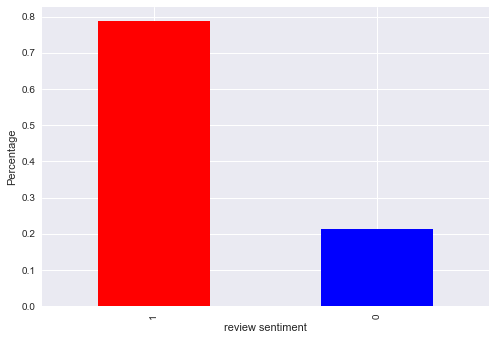

In [12]:
pet['overall'].value_counts('1').plot(kind='Bar', color=['r','b'])
plt.xlabel('review sentiment')
plt.ylabel('Percentage')

In [12]:
pet['overall'].value_counts('1')*100

1    78.719684
0    21.280316
Name: overall, dtype: float64

In [37]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer

nlp = spacy.load('en')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harishprabhala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [15]:
tokens = pet["summary"].apply(nltk.word_tokenize)

In [16]:
tokens.count()

157836

In [17]:
tokens.head()

0    [Nice, Distraction, for, my, cats, for, about,...
1                        [Entertaining, for, my, cats]
2                                       [Entertaining]
3                              [Happy, to, have, them]
4                    [You, really, only, need, vol, 2]
Name: summary, dtype: object

In [40]:
def preprocess (eachline):
    sentence = eachline.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    stop_words = (w for w in tokens if not w in stop)
    clean_words =(w for w in stop_words if not w.isnumeric())
    stemmed = [w for w in clean_words if lemmatizer.lemmatize(w)] 
    return ' '.join(stemmed)

In [45]:
cleaned_reviews = []
for w in pet['summary']:
    cleaned_reviews.append(preprocess(w))

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
Xtfidf=tfidfvectorizer.fit_transform(cleaned_reviews)

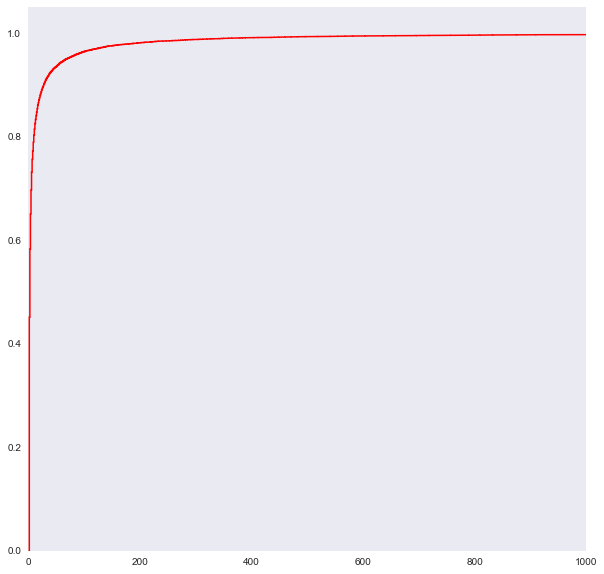

In [68]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df = list((Xtfidf > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c,y,normed=1, histtype='step', color='r', cumulative=True, linewidth=1.5, )
plt.xlim(-1,1000)
plt.grid()

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer1 = TfidfVectorizer(min_df=5)
X_clean=tfidfvectorizer1.fit_transform(cleaned_reviews)
y_clean = (pet.overall)

In [193]:
idf = tfidfvectorizer1.idf_
idf_score =(dict(zip(tfidfvectorizer1.get_feature_names(), idf)))

In [194]:
a = pd.DataFrame.from_dict(idf_score, orient='index')

In [195]:
a.columns = ['Score']

In [196]:
a.sort_values('Score', ascending=False).head(10)

,Score
generous,11.177559
biomax,11.177559
dna,11.177559
diva,11.177559
pluses,11.177559
plugged,11.177559
disposal,11.177559
bistro,11.177559
dispensers,11.177559
disk,11.177559


In [70]:
from sklearn.cross_validation import StratifiedKFold

In [71]:
kf = StratifiedKFold(y_clean,n_folds=5, shuffle=True)
for train, test in kf:
    X1cl_train, X1cl_test = X_clean[train], X_clean[test]
    y1cl_train, y1cl_test = y_clean[train], y_clean[test]

In [199]:
X1cl_train.shape, X1cl_test.shape, y1cl_train.shape, y1cl_test.shape

((126270, 5553), (31566, 5553), (126270,), (31566,))

In [200]:
clf1=MultinomialNB(alpha=0.1)
clf1.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(clf1.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(clf1.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of MultinomialDB with alpha = 0.01:')
print(classification_report(clf1.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.860324399671
Accuracy of training data:  0.867680367467


Classification report summary of MultinomialDB with alpha = 0.01:
             precision    recall  f1-score   support

          0       0.46      0.79      0.59      3928
          1       0.97      0.87      0.92     27638

avg / total       0.90      0.86      0.87     31566



In [201]:
y_true_MNB = np.array(y1cl_test).astype(int)
y_pred_MNB = np.array(clf1.predict(X1cl_test)).astype(int)
MultinomialNB_auc = roc_auc_score(y_true_MNB, y_pred_MNB)
MultinomialNB_auc

0.71579922005375174

In [222]:
probas1_ = clf1.predict_proba(X1cl_test)[:,1]

In [223]:
probas1_

array([ 0.93457469,  0.97360055,  0.82712602, ...,  0.7794564 ,
        0.79081764,  0.88052286])

In [224]:
fpr1,tpr1,_ = roc_curve(y_true_MNB, probas1_)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

In [205]:
Cs = [0.001, 0.1, 1, 10, 100]
parameters = {'C':Cs}
log = LogisticRegression()
clf2 = grid_search.GridSearchCV(log, parameters)

In [206]:
samplex = X1cl_train[:80000]
sampley = y1cl_train[:80000]

In [470]:
clf2.fit(samplex,sampley)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [471]:
clf2.best_params_

{'C': 1}

In [202]:
logit=LogisticRegression(C=10)
logit.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Logistic Regression C=1:')
print(classification_report(logit.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.879427231832
Accuracy of training data:  0.892595232438


Classification report summary of Logistic Regression C=1:
             precision    recall  f1-score   support

          0       0.62      0.77      0.69      5401
          1       0.95      0.90      0.93     26165

avg / total       0.89      0.88      0.88     31566



In [61]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [207]:
y_true_auc = np.array(y1cl_test).astype(int)

In [208]:
y_pred_auc = np.array(logit.predict(X1cl_test)).astype(int)

In [209]:
Logistic_auc = roc_auc_score(y_true_auc, y_pred_auc)
Logistic_auc

0.78431298962661677

In [226]:
probas2_ = logit.predict_proba(X1cl_test)[:,1]

In [227]:
fpr2,tpr2,_ = roc_curve(y_true_auc, probas2_)

In [211]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [212]:
dtree=DecisionTreeClassifier(max_depth=200, criterion='entropy')
dtree.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(dtree.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(dtree.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Decision Tree:')
print(classification_report(dtree.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.862763733131
Accuracy of training data:  0.942108180882


Classification report summary of Decision Tree:
             precision    recall  f1-score   support

          0       0.56      0.73      0.64      5175
          1       0.94      0.89      0.92     26391

avg / total       0.88      0.86      0.87     31566



In [213]:
y_true_auc3 = np.array(y1cl_test).astype(int)
y_pred_auc3 = np.array(dtree.predict(X1cl_test)).astype(int)
DecisionTree_auc = roc_auc_score(y_true_auc3, y_pred_auc3)
DecisionTree_auc

0.75330607409171224

In [228]:
probas3_ = dtree.predict_proba(X1cl_test)[:,1]

In [229]:
fpr3,tpr3,_ = roc_curve(y_true_auc3, probas3_)

In [216]:
from sklearn.ensemble import RandomForestClassifier 

In [232]:
random=RandomForestClassifier(n_estimators=50)
random.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of RandomForest:')
print(classification_report(random.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.884907812203
Accuracy of training data:  0.980106121802


Classification report summary of RandomForest:
             precision    recall  f1-score   support

          0       0.64      0.78      0.70      5482
          1       0.95      0.91      0.93     26084

avg / total       0.90      0.88      0.89     31566



In [233]:
y_true_auc4 = np.array(y1cl_test).astype(int)
y_pred_auc4 = np.array(random.predict(X1cl_test)).astype(int)
RandomForest_auc=roc_auc_score(y_true_auc4, y_pred_auc4)
RandomForest_auc

0.79469220532390805

In [219]:
proba4_ = random.predict_proba(X1cl_test)[:,1]

In [230]:
fpr4,tpr4,_ = roc_curve(y_true_auc4, proba4_)

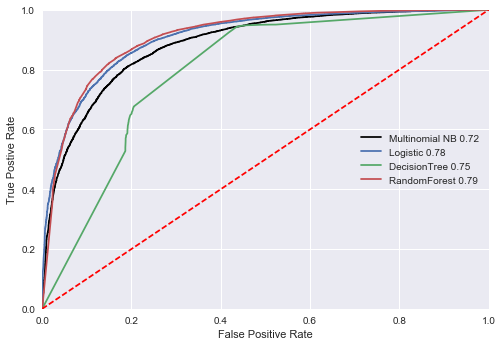

In [234]:
plt.plot(fpr1,tpr1, label=('Multinomial NB %.2f' %MultinomialNB_auc), color='k')
plt.plot(fpr2,tpr2, label=('Logistic %.2f' %Logistic_auc))
plt.plot(fpr3,tpr3, label=('DecisionTree %.2f' %DecisionTree_auc))
plt.plot(fpr4,tpr4, label=('RandomForest %.2f' %RandomForest_auc))
plt.legend(loc='right')
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Postive Rate')
plt.xlabel('False Positive Rate')
plt.show()